## MOwNiT Laboratorium 6 Poszukiwania pierwiastków

In [1]:
using Roots  
using Plots
using ForwardDiff
using DataFrames
using Statistics
using Images
using PolynomialRoots

### Zadanie 1
Przetestować trzy metody poszukiwania pierwiastków:
- wykorzystującą przedział i zmianę znaku,
- wykorzystującą pochodną,
- wykorzystującą przybliżenie pochodnej

Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki.

In [109]:
f1(x) = 2 * x - exp( - x )
f2(x) = exp( x ) - 1 / ( 10 * x )^2
f3(x) = (x-1)^7
f4(x) = x^3 - 2*x - 5
f5(x) = ( x + 3 ) * ( x - 1 )^2
f6(x) = exp( x ) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3
D(f) = x->ForwardDiff.derivative(f, float(x))
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
functions = [f1,f2,f3,f4,f5,f6]

intervals = Dict(
    f1 => (0,1),
    f2 => (-10e-10,10e-10),
    f3 => (-2,4),
    f4 => (1,3),
    f5 => (-4,2),
    f6 => (-10,5)
)

Dict{Function,Tuple{Real,Real}} with 6 entries:
  f5 => (-4, 2)
  f4 => (1, 3)
  f2 => (-1.0e-9, 1.0e-9)
  f1 => (0, 1)
  f6 => (-10, 5)
  f3 => (-2, 4)

In [110]:
plotf(f) = plot(f,intervals[f][1],intervals[f][2],label=[f])

plotf (generic function with 1 method)

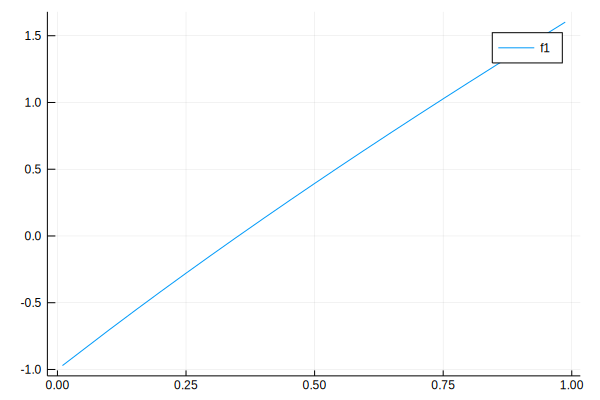

In [111]:
plotf(f1)

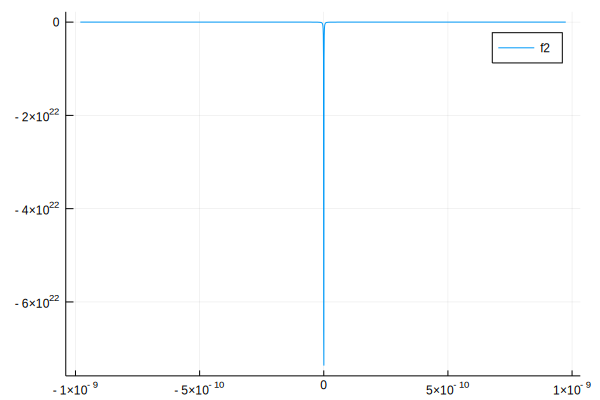

In [112]:
plotf(f2)

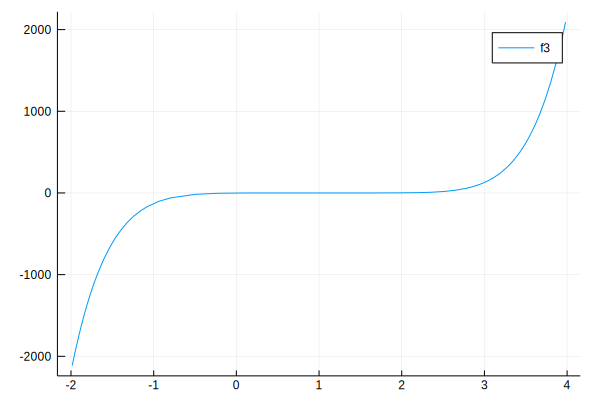

In [6]:
plotf(f3)

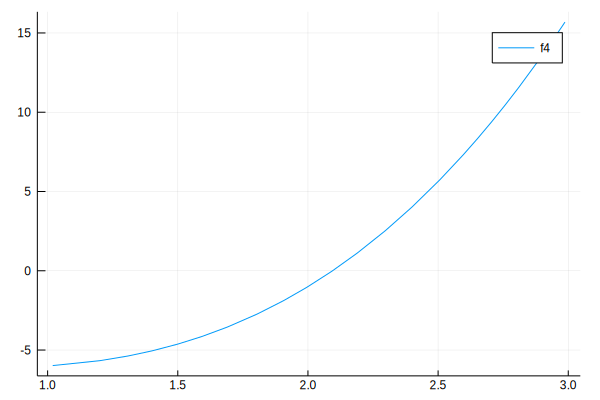

In [7]:
plotf(f4)

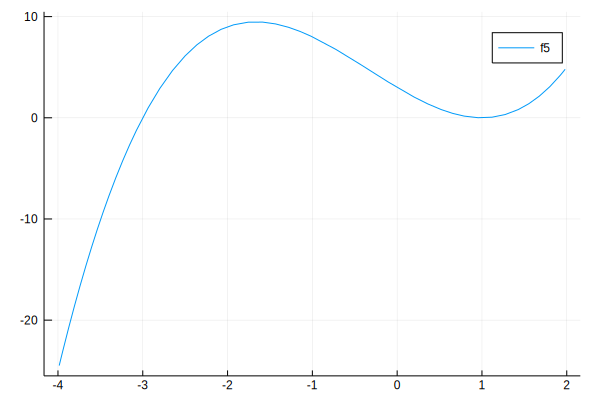

In [8]:
plotf(f5)

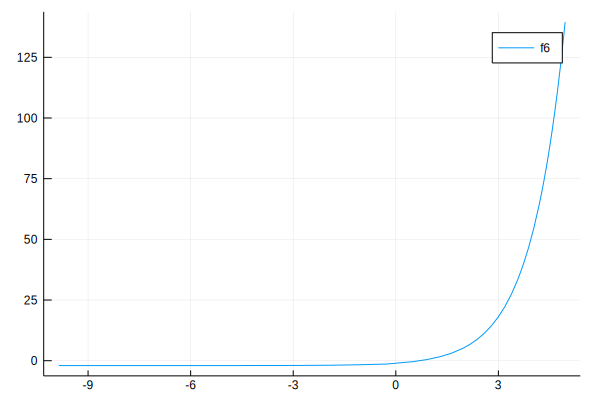

In [9]:
plotf(f6)

In [10]:
fz1(f) = find_zero(f, intervals[f],Bisection(), verbose=true)
fz2(f) = find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true)
fz3(f) = find_zero(f, 0, Order16(), verbose=true)
finds_zero = [fz1,fz2,fz3]

3-element Array{Function,1}:
 fz1
 fz2
 fz3

In [11]:
for f in functions
    for fz in finds_zero
        try
            println(f)
            x=fz(f)
            println("Is zero: ",iszero(f(x)))
            println("Sign: ",sign(f(prevfloat(x))) *sign(f(nextfloat(x))))
        catch
            println("error")
        end
    end
end

f1
Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.2504882812500000,  0.5004882812500000)
(a_11, b_11) = ( 0.2504882812500000,  0.3753662109375000)
(a_12, b_12) = ( 0.3129272460937500,  0.3753662109375000)
(a_13, b_13) = ( 0.3441467285156


* Converged to: 0.9943622898863396
* Algorithm: Roots.Halley()
* iterations: 18
* function evaluations: 57
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.2500000000000000,	 fx_1 = -0.1334838867187500
x_2 =  0.4375000000000000,	 fx_2 = -0.0178179480135441
x_3 =  0.5781250000000000,	 fx_3 = -0.0023784089542005
x_4 =  0.6835937500000000,	 fx_4 = -0.0003174792714134
x_5 =  0.7626953125000000,	 fx_5 = -0.0000423783671009
x_6 =  0.8220214843750000,	 fx_6 = -0.0000056568291534
x_7 =  0.8665161132812500,	 fx_7 = -0.0000007550955419
x_8 =  0.8998870849609375,	 fx_8 = -0.0000001007930878
x_9 =  0.9249153137207031,	 fx_9 = -0.0000000134542531
x_10 =  0.9436864852905273,	 fx_10 = -0.0000000017959260
x_11 =  0.9577648639678955,	 fx_11 = -0.0000000002397272
x_12 =  0.9683236479759216,	 fx_12 = -0.0000000000319997
x_13 =  0.9762427359819412,	 fx_13 = -0.0000000000042714
x_14 =  0.9821820519864559,	 fx_14 =


* Converged to: 0.9999999928866423
* Algorithm: Roots.Halley()
* iterations: 17
* function evaluations: 54
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6818181818181818,	 fx_1 =  0.3727460555972954
x_2 =  0.8966140054160272,	 fx_2 =  0.0416495973588628
x_3 =  0.9658317402597549,	 fx_3 =  0.0046299894774079
x_4 =  0.9886429104886695,	 fx_4 =  0.0005144690517210
x_5 =  0.9962178828957884,	 fx_5 =  0.0000571635382069
x_6 =  0.9987396915170502,	 fx_6 =  0.0000063515080432
x_7 =  0.9995799412892999,	 fx_7 =  0.0000007057231627
x_8 =  0.9998599853309650,	 fx_8 =  0.0000000784136853
x_9 =  0.9999533289882072,	 fx_9 =  0.0000000087126317
x_10 =  0.9999844430565740,	 fx_10 =  0.0000000009680702
x_11 =  0.9999948143589140,	 fx_11 =  0.0000000001075634
x_12 =  0.9999982714537183,	 fx_12 =  0.0000000000119515
x_13 =  0.9999994238179891,	 fx_13 =  0.0000000000013279
x_14 =  0.9999998079393390,	 fx_14 =

In [12]:
df=DataFrame(
    Method=String[], 
    Function=Function[], 
    Iterations=Int64[],
    Evaluations=Int64[],
    Result=Float64[],
)

,Method,Function,Iterations,Evaluations,Result
,String,Function,Int64,Int64,Float64


In [13]:
push!(df,("Order16",f1,2,9,0.35173371124919584))
push!(df,("Order16",f2,0,0,NaN))
push!(df,("Order16",f3,18,57,0.9956847899235232))
push!(df,("Order16",f4,7,36,2.0945514815423265))
push!(df,("Order16",f5,8,41,0.9999999916105975))
push!(df,("Order16",f6,0,0,NaN))

,Method,Function,Iterations,Evaluations,Result
,String,Function,Int64,Int64,Float64
1,Order16,f1,2,9,0.351734
2,Order16,f2,0,0,NaN
3,Order16,f3,18,57,0.995685
4,Order16,f4,7,36,2.09455
5,Order16,f5,8,41,1.0
6,Order16,f6,0,0,NaN


In [14]:
push!(df,("Halley",f1,3,12,0.35173371124919584))
push!(df,("Halley",f2,0,0,NaN))
push!(df,("Halley",f3,10,51,0.9943622898863396))
push!(df,("Halley",f4,0,0,NaN))
push!(df,("Halley",f5,17,54,0.9999999928866423))
push!(df,("Halley",f6,0,0,NaN))

,Method,Function,Iterations,Evaluations,Result
,String,Function,Int64,Int64,Float64
1,Order16,f1,2,9,0.351734
2,Order16,f2,0,0,NaN
3,Order16,f3,18,57,0.995685
4,Order16,f4,7,36,2.09455
5,Order16,f5,8,41,1.0
6,Order16,f6,0,0,NaN
7,Halley,f1,3,12,0.351734
8,Halley,f2,0,0,NaN
9,Halley,f3,10,51,0.994362


In [15]:
push!(df,("BisectionExact",f1,61,63,0.35173371124919584))
push!(df,("BisectionExact",f2,0,0,NaN))
push!(df,("BisectionExact",f3,58,60,1.0))
push!(df,("BisectionExact",f4,53,55,2.094551481542327))
push!(df,("BisectionExact",f5,60,62,-3.0))
push!(df,("BisectionExact",f6,0,2,0.0))

,Method,Function,Iterations,Evaluations,Result
,String,Function,Int64,Int64,Float64
1,Order16,f1,2,9,0.351734
2,Order16,f2,0,0,NaN
3,Order16,f3,18,57,0.995685
4,Order16,f4,7,36,2.09455
5,Order16,f5,8,41,1.0
6,Order16,f6,0,0,NaN
7,Halley,f1,3,12,0.351734
8,Halley,f2,0,0,NaN
9,Halley,f3,10,51,0.994362


In [16]:
udf = unstack(df,:Function,:Method, :Result)

,Function,BisectionExact,Halley,Order16
,Function,Float64⍰,Float64⍰,Float64⍰
1,f1,0.351734,0.351734,0.351734
2,f2,NaN,NaN,NaN
3,f3,1.0,0.994362,0.995685
4,f4,2.09455,NaN,2.09455
5,f5,-3.0,1.0,1.0
6,f6,0.0,NaN,NaN


In [17]:
df[:Iszero] = map((f,x) -> iszero(f(x)),df[:Function], df[:Result])

18-element Array{Bool,1}:
  true
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false
  true
 false
  true
 false
  true
 false

In [18]:
df[:Sign] = map((f,x) -> sign(f(prevfloat(x))) *sign(f(nextfloat(x))),df[:Function], df[:Result])


18-element Array{Float64,1}:
  -1.0
 NaN  
   1.0
  -1.0
   1.0
 NaN  
  -1.0
 NaN  
   1.0
 NaN  
   1.0
 NaN  
  -1.0
 NaN  
  -1.0
  -1.0
  -1.0
 NaN  

In [19]:
df

,Method,Function,Iterations,Evaluations,Result,Iszero,Sign
,String,Function,Int64,Int64,Float64,Bool,Float64
1,Order16,f1,2,9,0.351734,true,-1.0
2,Order16,f2,0,0,NaN,false,NaN
3,Order16,f3,18,57,0.995685,false,1.0
4,Order16,f4,7,36,2.09455,false,-1.0
5,Order16,f5,8,41,1.0,false,1.0
6,Order16,f6,0,0,NaN,false,NaN
7,Halley,f1,3,12,0.351734,true,-1.0
8,Halley,f2,0,0,NaN,false,NaN
9,Halley,f3,10,51,0.994362,false,1.0


In [20]:
dfData = by(df, [:Method]) do part
        DataFrame(
            IsResult=Statistics.count(map(r -> !isnan(r), part[:Result])),
            Iszero=Statistics.count(part[:Iszero]),
            IsSign=Statistics.count(part[:Sign].==-1.0),
        )
end

,Method,IsResult,Iszero,IsSign
,String,Int64,Int64,Int64
1,Order16,4,1,2
2,Halley,3,1,1
3,BisectionExact,5,3,4


### Zadanie 2
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

Zademnstruję na przykładzie funkcji $f_5 = ( x + 3 ) * ( x - 1 )^2$. 

Choć funkcja wydaje się sotsunkowo łatwa, to tylko metoda bisekcji wskazała poprawny wynik, a pozstałe dwie wskazały fałszywy wynik. 

In [21]:
for fz in finds_zero
        x=fz(f5)
        println("Is zero: ",iszero(f5(x)))
        println("Sign: ",sign(f5(prevfloat(x))) *sign(f5(nextfloat(x))))
end


Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-4.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-4.0000000000000000, -0.0000000000000000)
(a_2, b_2) = (-4.0000000000000000, -0.0000000000000000)
(a_3, b_3) = (-4.0000000000000000, -0.0000000000000000)
(a_4, b_4) = (-4.0000000000000000, -0.0000000000000000)
(a_5, b_5) = (-4.0000000000000000, -0.0000000009167707)
(a_6, b_6) = (-4.0000000000000000, -0.0000605583190918)
(a_7, b_7) = (-4.0000000000000000, -0.0155639648437500)
(a_8, b_8) = (-4.0000000000000000, -0.2495117187500000)
(a_9, b_9) = (-4.0000000000000000, -0.9990234375000000)
(a_10, b_10) = (-4.0000000000000000, -1.9990234375000000)
(a_11, b_11) = (-4.0000000000000000, -2.9990234375000000)
(a_12, b_12) = (-3.4995117187500000, -2.9990234375000000)
(a_13, b_13) = (-3.2492675781250000, -2.9990234375

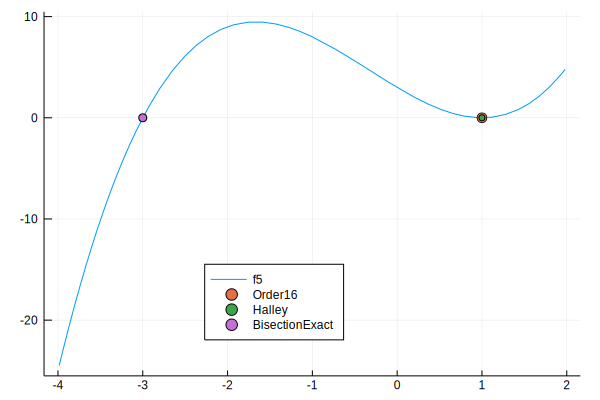

In [22]:
plotf(f5)
scatter!([1.0],[f5(1.0)],label=["","Order16"],markersize = 5)
scatter!([1.0],[f5(1.0)],label=["","","Halley",],markersize = 3)
scatter!([-3.0],[f5(1.0)],label=["","","","BisectionExact"],legend=:bottom,)

### Zadanie 3
Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

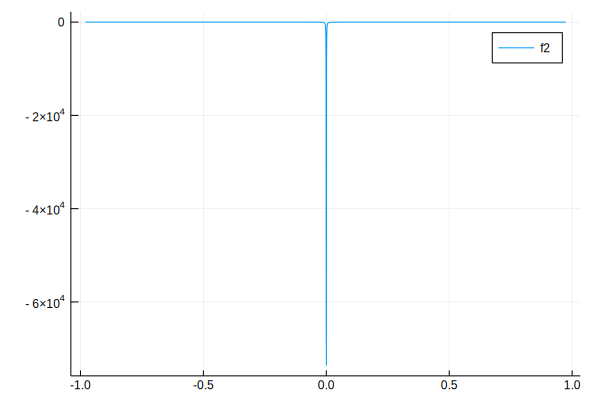

In [23]:
plotf(f2)

In [24]:
x=fz1(f2)

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



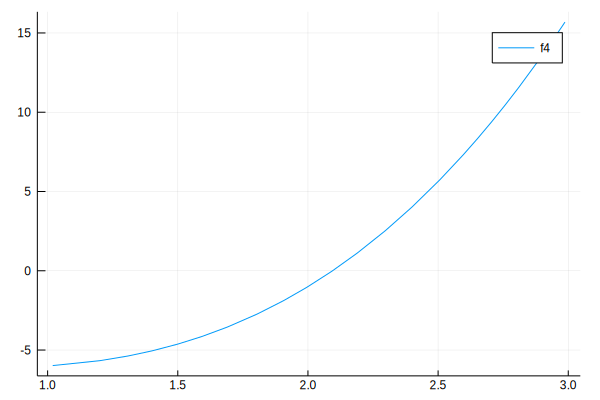

In [25]:
plotf(f4)

In [26]:
x=fz2(f4)

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Halley()

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -5.0000000000000000
x_1 =                NaN,	 fx_1 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = NaN")

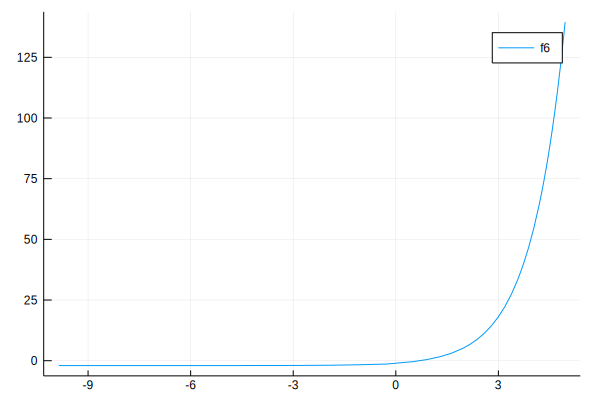

In [27]:
plotf(f6)

In [28]:
x=fz3(f6)

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Order16()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

### Zadanie 4
Namalowac wstegę Newtona i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny.

$$z\mapsto z-{\tfrac  {p(z)}{p'(z)}}$$

Każdy z punktów rysujemy kolorem $c(w)$, gdzie procedura wybierania $c(w)$ jest następująca:

- ${\displaystyle z_{0}=w;z_{k+1}=z_{k}-{\frac {p(z_{k})}{p'(z_{k})}}}$ (dla ${\displaystyle k\geq 0} k\geq 0)$,

- jeśli ${\displaystyle \lim _{n->\infty }{z_{n}}=\zeta _{k}} {\displaystyle \lim _{n->\infty }{z_{n}}=\zeta _{k}}$, to ${\displaystyle c(w)=c_{k}} {\displaystyle c(w)=c_{k}}$. Jeśli nie istnieje takie ${\displaystyle \zeta _{k}} {\displaystyle \zeta _{k}}$ 

(czyli metoda nie zbiega dla danego ${\displaystyle z_{0}} z_0$, to ${\displaystyle c(w)=c_{n+1}} {\displaystyle c(w)=c_{n+1}}$).

In [84]:
maxIteration = 20

function newtonFractal(fun,funD,size,roots,colors)
    
    sizeX=size;
    sizeY=size
    
    newImg = fill(RGB{Normed{UInt8,8}}(1,0,1), sizeX, sizeY)

    for x in 1:sizeX
        for y in 1:sizeY

            zx = (x/(sizeX+1))*3.5 -2.5
            zy = (y/(sizeY+1))*2 -1 
            z = complex(zx, zy)
   
            for iteration in 1:maxIteration
                z -= fun(z) / funD(z)
                tolerance = 0.000001
                for  root in roots
                    diff = z - root;                  
                    if abs(diff) < tolerance
                        newImg[x,y] = colors[root]
                    end
                end
            end 
        end       
    end
    newImg
end

newtonFractal (generic function with 1 method)

${\displaystyle f(z)=z^{3}-1}$

In [85]:
fNewton(z) = z^5 -1

fNewtonD(z) = 5*z^4

fNewtonD (generic function with 1 method)

In [86]:
rootsArray = roots([-1,0,0,0,0,1])

5-element Array{Complex{Float64},1}:
 -0.8090169943749473 - 0.5877852522924731im
                 1.0 - 0.0im               
  0.3090169943749475 + 0.9510565162951535im
 0.30901699437494734 - 0.9510565162951535im
 -0.8090169943749475 + 0.5877852522924731im

In [87]:
colors = Dict(
    rootsArray[1] => RGB{Normed{UInt8,8}}(1,0,0),
    rootsArray[2] => RGB{Normed{UInt8,8}}(0,1,0),
    rootsArray[3] => RGB{Normed{UInt8,8}}(0,0,1),
    rootsArray[4] => RGB{Normed{UInt8,8}}(1,1,0),
    rootsArray[5] => RGB{Normed{UInt8,8}}(0,1,1),
)

Dict{Complex{Float64},RGB{Normed{UInt8,8}}} with 5 entries:
  1.0-0.0im            => RGB{N0f8}(0.0,1.0,0.0)
  -0.809017-0.587785im => RGB{N0f8}(1.0,0.0,0.0)
  0.309017+0.951057im  => RGB{N0f8}(0.0,0.0,1.0)
  -0.809017+0.587785im => RGB{N0f8}(0.0,1.0,1.0)
  0.309017-0.951057im  => RGB{N0f8}(1.0,1.0,0.0)

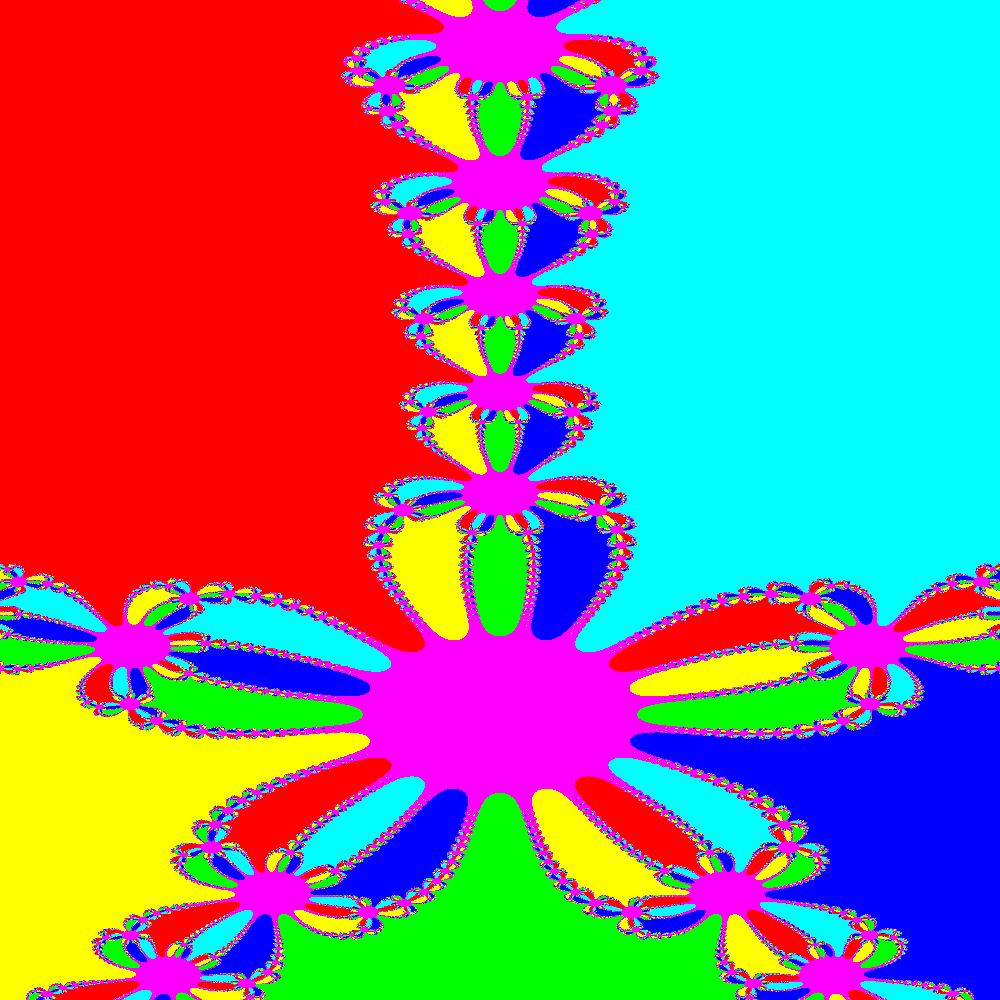

In [88]:
newtonFractal(fNewton,fNewtonD,1000,rootsArray,colors)